# YearPredictionMSD Data Set
## Python for Data Analysis - Final Project
### CESAR Thomas, CHARRUEY Adrien - ESILV, A4, DIA 3

### Library Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

### Data Set Import
The data set can be downloaded here : https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD

In [2]:
df = pd.read_csv(r'C:\Users\adrie\Documents\ESILV 2021-2022\S7\Python for data analysis S7\Final Project CESAR CHARRUEY\YearPredictionMSD.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


### Data Preprocessing

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


We rename the first column of the dataframe

In [4]:
df.rename(columns={0:'year'}, inplace=True)

In [5]:
df.head()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


We check for null values :

In [6]:
df.isnull().sum().sum()

0

We can see that there are no null values in the dataframe. We can proceed to the exploratory analysis.
### Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


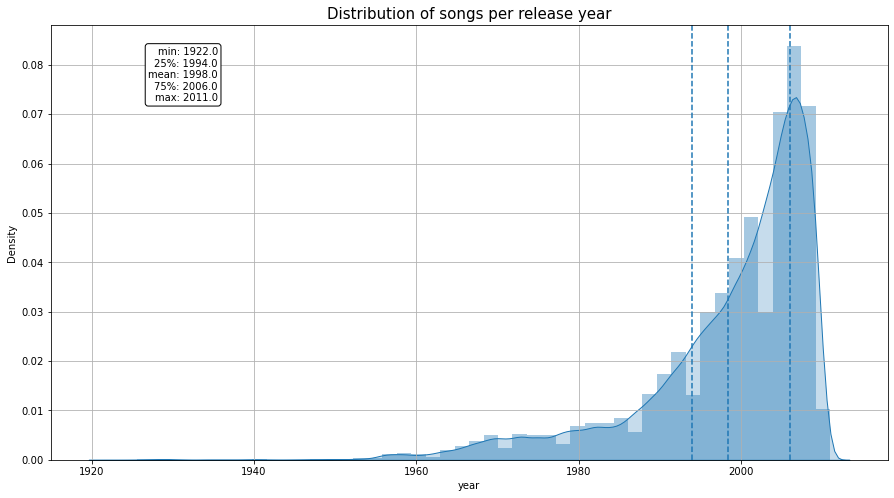

In [7]:
fig, ax = plt.subplots(figsize=(15,8))

ax.set_title('Distribution of songs per release year', fontsize=15)
variable = df['year']

sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
des = df['year'].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(True)

des = round(des).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.20, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1));

We can see that there is a peak in the year 2000s. Unbalanced data like that could result in our models to predict only release years around the year 2000s. We might have to use downsampling to solve this problem.

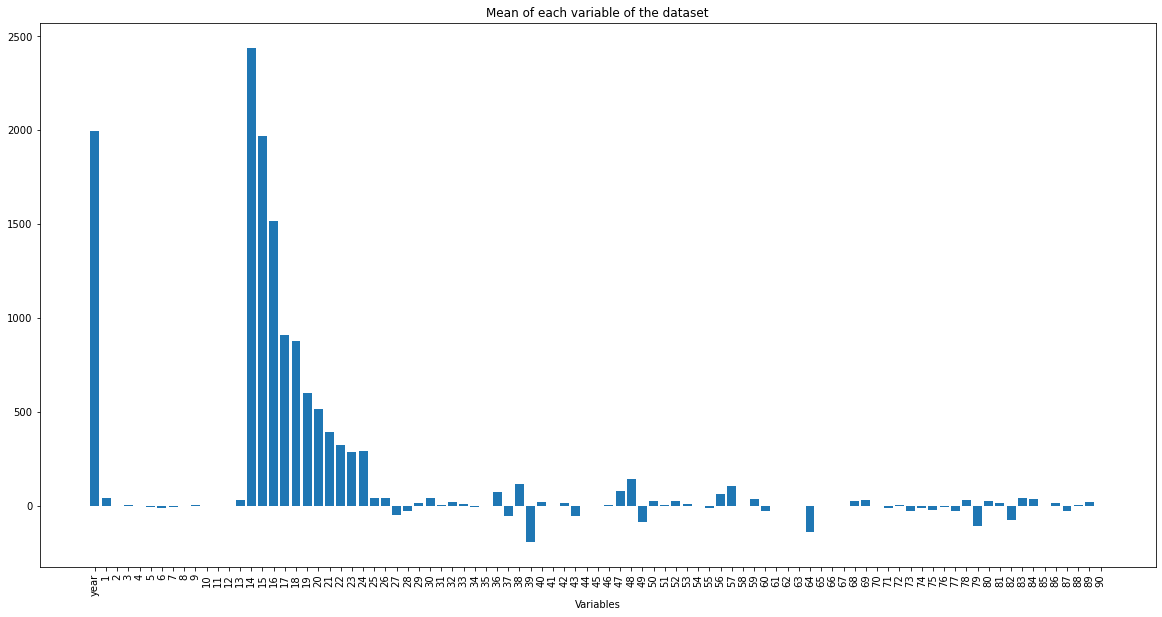

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df.columns.map(str), df.mean().values)
ax.set_xlabel('Variables')
plt.xticks(rotation = 90)
plt.title('Mean of each variable of the dataset');

The year and variables from 14 to 24 have much greater means than the other variables. We will have to scale the data before using it for our models.

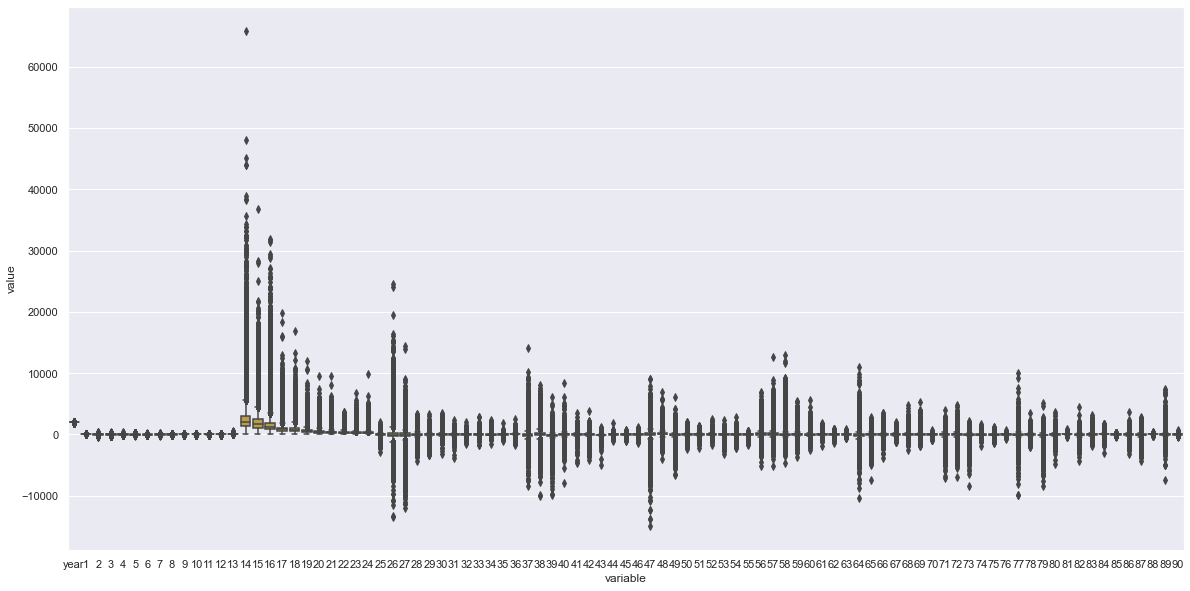

In [9]:
df_melted = pd.melt(df)

sns.set(rc={"figure.figsize":(20, 10)}) #width=3, #height=4
sns.boxplot(x='variable', y='value', data=df_melted);

We can see that there is a great number of major outliers for variables 14 to 90.

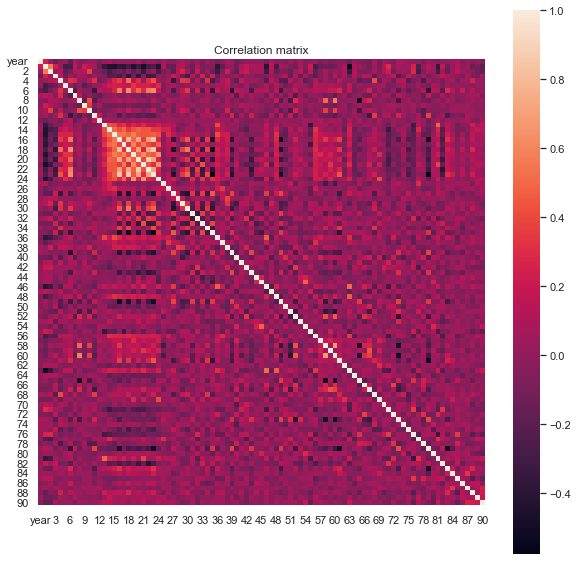

In [10]:
# Correlation between the release year and features
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation matrix")
sns.heatmap(corr, square=True);

We focus on the correlation of the features to the year.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


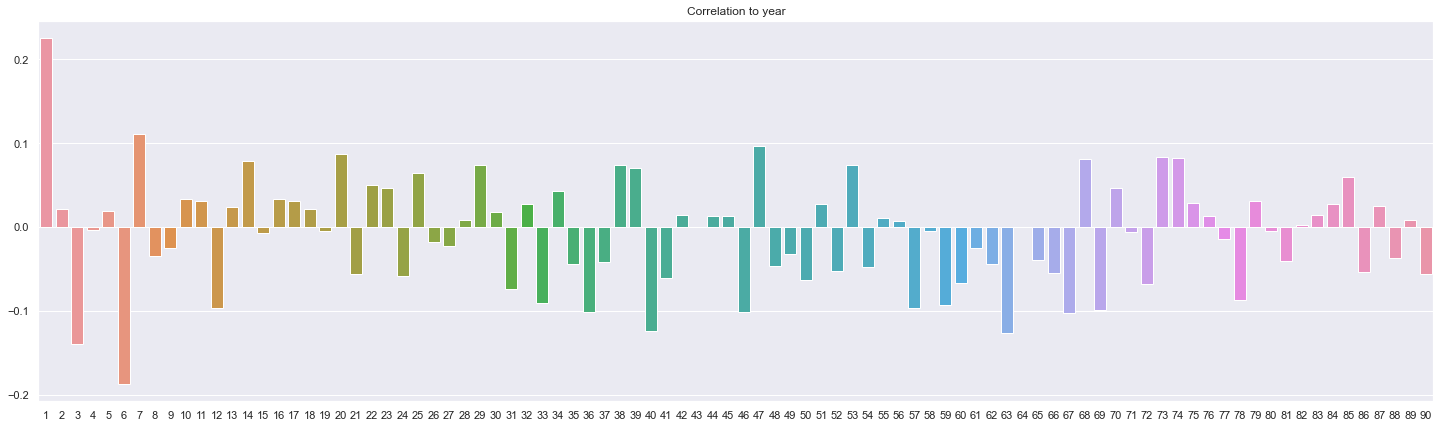

In [11]:
fig, ax = plt.subplots(figsize=(25,7)) 
sns.barplot(corr['year'][1:].index,corr['year'][1:].values)
plt.title('Correlation to year');

### Splitting the data set
We split the data set into a training and a testing data set, before applying any pre-processing of the data,as it would otherwise put information from the testing set into the training set.

We follow the instruction given on the data set page on the UCI Machine Learning Repository and split the data set this way :

train: first 463,715 examples

test: last 51,630 examples

Which according to the website "avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set."

In [12]:
df_train=df.iloc[:463715,:]
print(df_train.shape)
df_test=df.iloc[463715:,:]
print(df_test.shape)

(463715, 91)
(51630, 91)


In [13]:
df_train.describe()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,...,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000
mean,1998.386095,43.385488,1.261091,8.650195,1.130763,-6.512725,-9.565527,-2.384609,-1.793722,3.714584,...,15.743361,-73.067753,41.423976,37.780868,0.345259,17.599280,-26.364826,4.444985,19.739307,1.323326
std,10.939767,6.079139,51.613473,35.264750,16.334672,22.855820,12.836758,14.580245,7.961876,10.579241,...,32.086356,175.376872,121.794610,94.874474,16.153797,114.336522,174.187892,13.320996,184.843503,22.045404
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-318.223330
25%,1994.000000,39.957540,-26.153810,-11.441920,-8.515155,-20.636960,-18.468705,-10.776340,-6.461400,-2.303600,...,-1.798085,-139.062035,-20.918635,-4.711470,-6.758160,-31.563615,-101.396245,-2.572830,-59.598030,-8.813335
50%,2002.000000,44.262570,8.371550,10.470520,-0.691610,-5.992740,-11.208850,-2.047850,-1.735440,3.816840,...,9.161360,-52.878010,28.709870,33.494550,0.828350,15.554490,-21.123570,3.111120,7.586950,0.052840
75%,2006.000000,47.833650,36.143780,29.741165,8.756995,7.749590,-2.422590,6.515710,2.905130,9.950960,...,26.248290,13.620660,89.419995,77.674700,8.495715,67.743725,52.299850,9.948955,86.203115,9.670740
max,2011.000000,61.970140,384.065730,322.851430,289.527430,262.068870,119.815590,172.402680,105.210280,146.297950,...,840.973380,4469.454870,3210.701700,1672.647100,260.544900,3662.065650,2833.608950,463.419500,7393.398440,600.766240


In [40]:
df_test.describe()

,year,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,...,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000
mean,1998.495758,43.401835,1.545196,8.731564,1.463758,-6.920730,-9.130814,-2.449289,-1.788870,3.847252,...,15.863589,-76.997938,42.606243,39.310543,0.050725,18.297317,-25.870845,4.581295,22.692133,1.381016
std,10.852015,5.962572,51.281696,35.303265,16.212757,22.902284,13.038397,14.496472,7.981406,10.614668,...,32.218761,177.740419,126.057675,96.608422,16.230899,115.244623,172.075713,13.573491,191.839796,22.472760
min,1927.000000,6.697670,-303.172820,-245.410920,-89.217700,-131.846730,-57.980610,-113.116000,-57.871990,-72.142120,...,-246.357820,-3129.093610,-1110.461140,-1744.646510,-219.614190,-1774.001580,-2854.346800,-157.341220,-2506.955030,-381.424430
25%,1995.000000,39.929720,-25.184490,-11.600835,-8.230815,-20.933628,-18.168130,-10.825130,-6.531265,-2.213935,...,-1.941518,-143.866858,-21.597855,-4.348418,-7.012528,-31.828520,-102.875242,-2.515942,-58.742800,-8.882680
50%,2002.000000,44.229145,8.890255,10.548425,-0.319695,-6.123600,-11.018170,-2.038705,-1.746645,3.889485,...,9.279585,-54.900645,29.508960,34.781505,0.757470,16.069910,-21.931495,3.174520,9.395170,0.054950
75%,2006.000000,47.836822,35.981468,29.940652,9.085015,7.680063,-2.122810,6.456940,2.984270,10.051895,...,26.487203,12.322653,91.861593,78.880403,8.278785,68.400735,53.173012,10.117640,87.555310,9.758345
max,2010.000000,60.277240,275.044700,263.002620,335.771820,146.915540,166.236890,83.602670,126.741270,88.007650,...,504.320310,1745.814420,1710.525910,1734.079690,169.214150,2010.117560,2032.431110,244.341800,6946.627670,677.899630


### Scaling
We scale all the features, not the target

In [41]:
# create the scaler 
ss = preprocessing.StandardScaler()

# create new dataframes to keep the non scaled ones
df_train_s=df_train.copy()
df_test_s=df_test.copy()

# apply the scaler to the dataframe subset 
df_train_s.iloc[:,1:] = ss.fit_transform(df_train_s.iloc[:,1:])
df_test_s.iloc[:,1:] = ss.transform(df_test_s.iloc[:,1:])

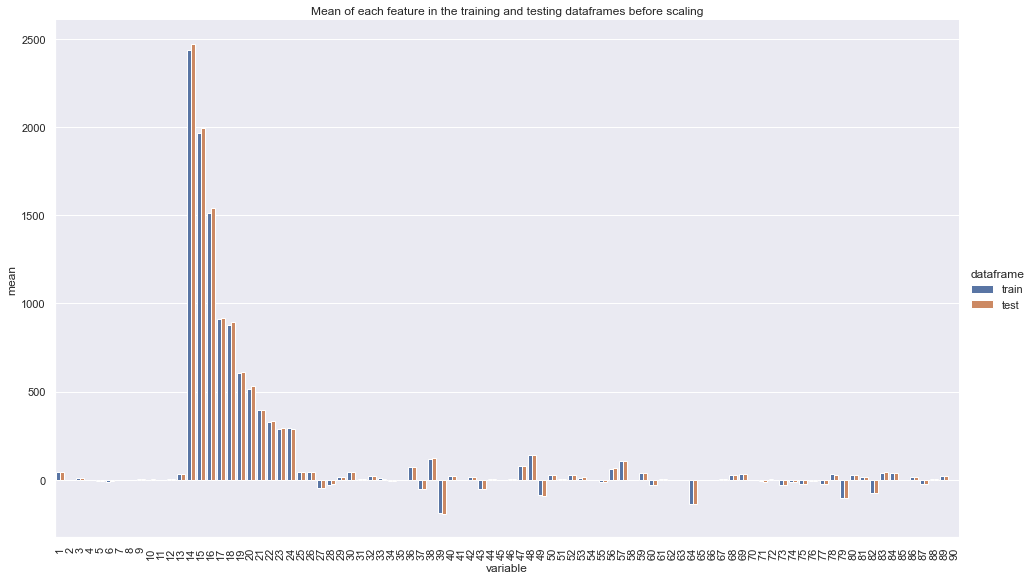

In [42]:
means = pd.DataFrame(list(zip(df_train.columns, df_train.mean(), df_test.mean())),
                   columns=['variable', 'train', 'test'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes before scaling');

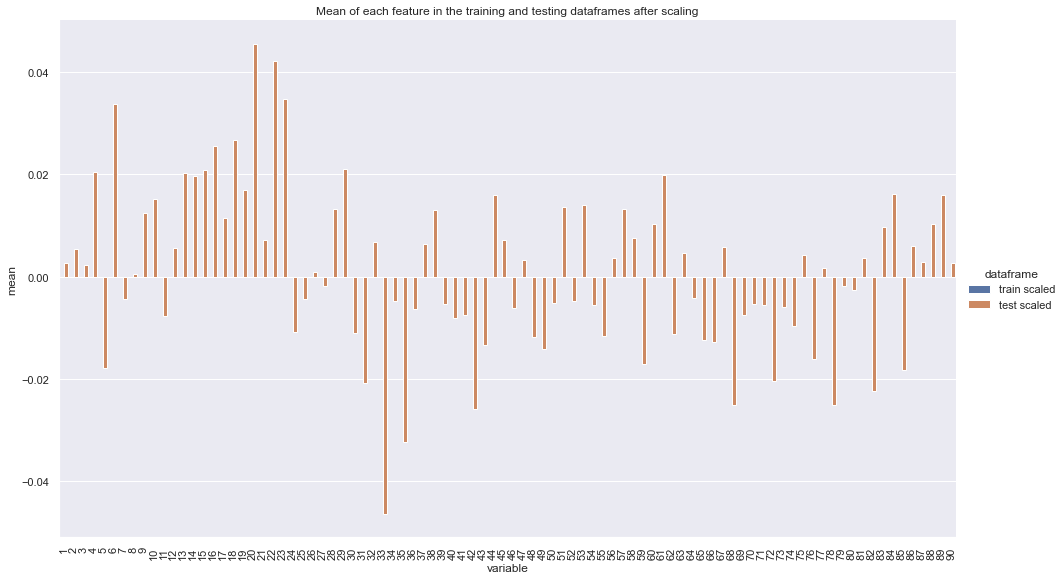

In [43]:
means = pd.DataFrame(list(zip(df_train.columns, df_train_s.mean(), df_test_s.mean())),
                   columns=['variable', 'train scaled', 'test scaled'])
means.drop(0, inplace=True)

means = pd.melt(means, id_vars="variable", var_name="dataframe", value_name="mean")

sns.catplot(x='variable', y='mean', hue='dataframe', data=means, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Mean of each feature in the training and testing dataframes after scaling');

We can see that the mean of the scaled dataframes are very close to zero.

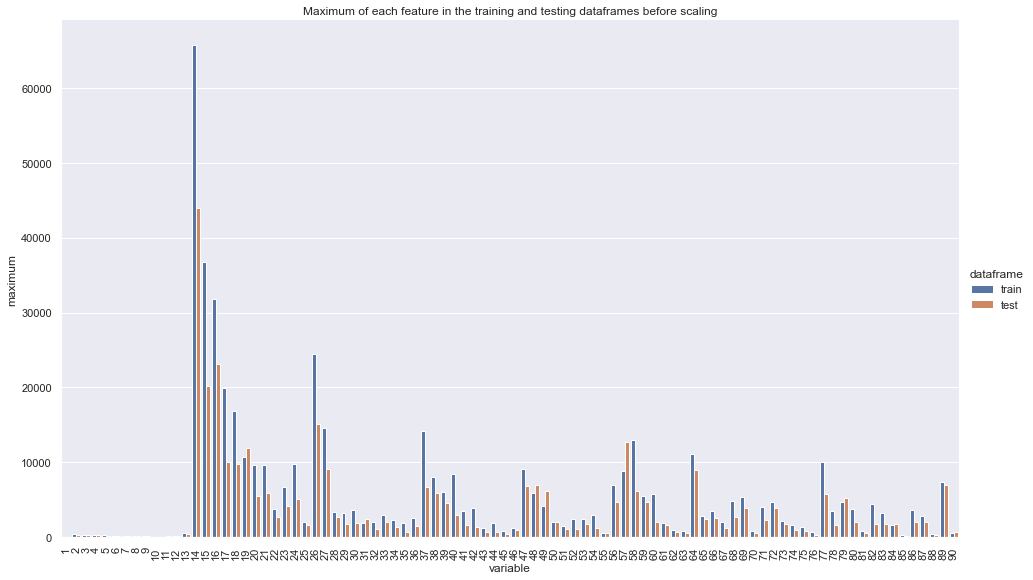

In [44]:
maxi = pd.DataFrame(list(zip(df_train.columns, df_train.max(), df_test.max())),
                   columns=['variable', 'train', 'test'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes before scaling');

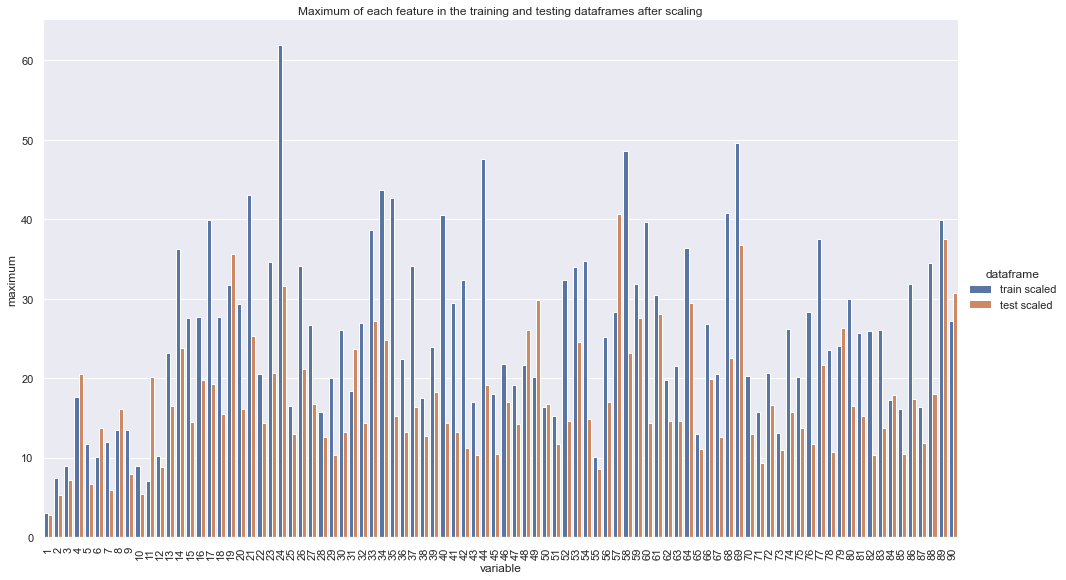

In [45]:
maxi = pd.DataFrame(list(zip(df_train.columns, df_train_s.max(), df_test_s.max())),
                   columns=['variable', 'train scaled', 'test scaled'])
maxi.drop(0, inplace=True)

maxi = pd.melt(maxi, id_vars="variable", var_name="dataframe", value_name="maximum")

sns.catplot(x='variable', y='maximum', hue='dataframe', data=maxi, kind='bar', height=8, aspect=1.7)
plt.xticks(rotation = 90)
plt.title('Maximum of each feature in the training and testing dataframes after scaling');

### Principal Component Analysis (PCA)
To reduce the dimensionnality of the data, we perform a PCA.

In [46]:
# Separate target and features
X_test = df_test_s.iloc[:,1:].values
y_test = df_test_s.iloc[:,0].values

X_train = df_train_s.iloc[:,1:].values
y_train = df_train_s.iloc[:,0].values


# Apply PCA
pca_test = decomposition.PCA(n_components=20).fit(X_test)
X_test_pca = pca_test.transform(X_test)
print('X_test.shape : ', X_test.shape, '\nX_test_pca.shape : ', X_test_pca.shape)

pca_train = decomposition.PCA(n_components=20).fit(X_train)
X_train_pca = pca_train.transform(X_train)
print('X_train.shape : ', X_train.shape, '\nX_train_pca.shape : ', X_train_pca.shape)


# Rename columns of the new dataframes
cols = ['year']
for m in range(1, X_train_pca.shape[1]+1):
    cols.append("PrincComp{}".format(m))

    
# We re concatenate X and y
df_test_pca = pd.DataFrame(np.append(y_test.reshape(y_test.shape[0],1), X_test_pca, axis=1), columns=cols)
print('df_test_pca.shape : ', df_test_pca.shape)

df_train_pca = pd.DataFrame(np.append(y_train.reshape(y_train.shape[0],1), X_train_pca, axis=1), columns=cols)
print('df_train_pca.shape : ', df_train_pca.shape)
df_train_pca.head()

X_test.shape :  (51630, 90) 
X_test_pca.shape :  (51630, 20)
X_train.shape :  (463715, 90) 
X_train_pca.shape :  (463715, 20)
df_test_pca.shape :  (51630, 21)
df_train_pca.shape :  (463715, 21)


,year,PrincComp1,PrincComp2,PrincComp3,PrincComp4,PrincComp5,PrincComp6,PrincComp7,PrincComp8,PrincComp9,...,PrincComp11,PrincComp12,PrincComp13,PrincComp14,PrincComp15,PrincComp16,PrincComp17,PrincComp18,PrincComp19,PrincComp20
0,2001.0,-3.247297,-0.525705,0.844005,0.079605,-0.488715,-0.421653,-0.522597,0.487791,-0.799153,...,-1.042361,1.041238,0.158919,0.156091,-0.499878,-0.099134,0.550841,-0.262439,0.518917,-0.121114
1,2001.0,-2.763440,0.970006,-0.134524,0.980321,0.064937,-0.084888,-0.833194,0.427134,0.579133,...,0.016250,1.330868,-0.427592,0.602135,-1.414689,0.057525,-0.214323,0.599099,-0.044371,-0.740810
2,2001.0,-3.004975,-1.542420,0.607177,0.856925,-0.677400,-0.772220,0.471308,0.249197,-0.750544,...,-0.071352,0.372620,0.664567,-0.806252,-0.700593,0.099041,0.022244,-0.113069,0.273117,-0.414441
3,2001.0,-3.310704,0.311561,-1.137716,0.496059,-1.354178,0.560208,0.191893,-0.262165,0.402365,...,-0.860514,0.615907,0.041851,1.334463,-0.021215,0.227445,-1.635060,0.004335,0.358129,0.601132
4,2001.0,-3.595795,-0.019520,0.121673,0.874415,-1.372410,-0.069472,-0.606467,-0.161008,0.738329,...,-0.659613,1.009496,-0.382552,0.521737,-0.468143,-0.983673,0.539033,-0.192248,-0.193959,-0.390402


## Modelling
## With PCA
### Linear Regression
We start by trying a linear regression

In [47]:
lr = linear_model.LinearRegression()
lr.fit(df_train_pca.iloc[:,1:], df_train_pca.iloc[:,0])

# we round predictions as we want years
y_pred_lr = np.round(lr.predict(df_test_pca.iloc[:,1:]),0)
pd.DataFrame(y_pred_lr, columns=['year']).head()

,year
0,2000.0
1,1999.0
2,1996.0
3,1998.0
4,1998.0


Metrics :

We create a function that will return a tuple of several metrics.

In [48]:
def metric(modelName, y_test, y_pred):
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    r2_adj = 1-((1-r2)* (len(y_test)-1)/(len(y_test)-91))
    rmse = np.sqrt(mse)

    print('explained_variance: ', round(explained_variance,4))    
    print('R^2: ', round(r2,4))
    print('R^2adj: ', round(r2_adj,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(rmse,4))
    
    return (modelName, explained_variance, mean_absolute_error, mse, rmse, r2, r2_adj)

We create a dataframe that we will fill with the metrics of each model we try.

In [49]:
df_metrics = pd.DataFrame(columns=['Model','ExplainedVariance', 'MeanAbsoluteError', 'MeanSquaredError', 'RootMeanSquaredError', 'R^2','R^2adjusted'])
df_metrics

,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted


In [50]:
y_test = df_test_pca.iloc[:,0]
df_metrics = df_metrics.append(dict(zip(df_metrics.columns,metric('linear regression', y_test, y_pred_lr))), ignore_index=True)
df_metrics

explained_variance:  -0.0936
R^2:  -0.0937
R^2adj:  -0.0956
MAE:  8.5616
MSE:  128.8006
RMSE:  11.349


,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted
0,linear regression,-0.093615,8.561611,128.800581,11.349034,-0.093718,-0.095628


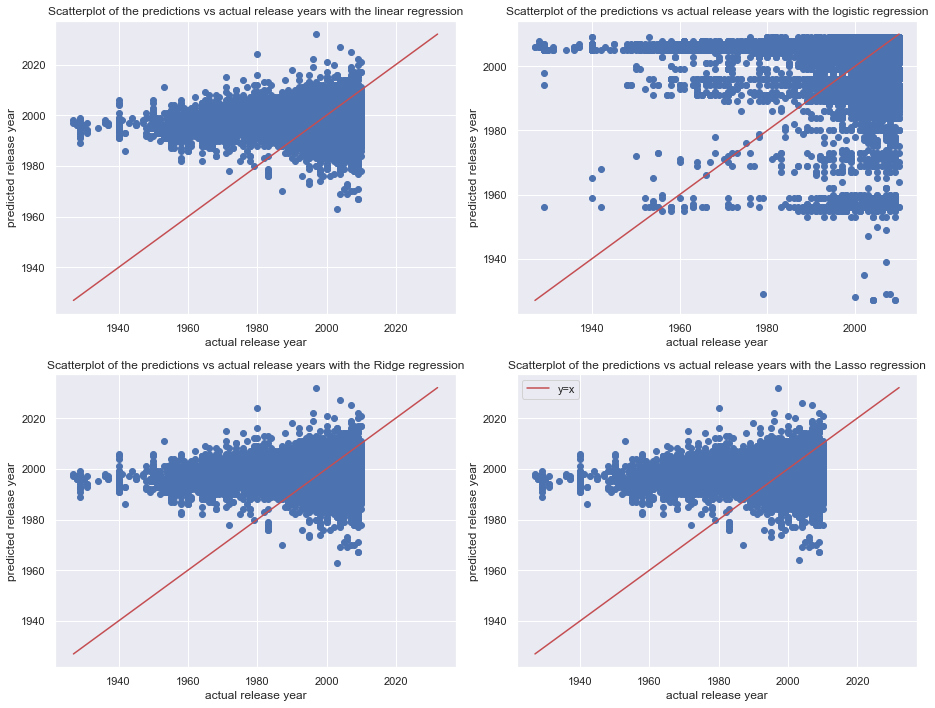

In [67]:
# Scatterplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,10))

# linear regression
ax[0,0].scatter(y_test, y_pred_lr)
ax[0,0].set_xlabel('actual release year')
ax[0,0].set_ylabel('predicted release year')

lineStart = min(y_test.min(), y_pred_lr.min())
lineEnd = max(y_test.max(), y_pred_lr.max()) 
ax[0,0].plot([lineStart, lineEnd], [lineStart, lineEnd], '-', color = 'r', label = 'y=x')
ax[0,0].set_title('Scatterplot of the predictions vs actual release years with the linear regression');


# logistic regression
ax[0,1].scatter(y_test, y_pred_logr)
ax[0,1].set_xlabel('actual release year')
ax[0,1].set_ylabel('predicted release year')

lineStart = min(y_test.min(), y_pred_logr.min())
lineEnd = max(y_test.max(), y_pred_logr.max()) 
ax[0,1].plot([lineStart, lineEnd], [lineStart, lineEnd], '-', color = 'r', label = 'y=x')
ax[0,1].set_title('Scatterplot of the predictions vs actual release years with the logistic regression');


# Ridge regression
ax[1,0].scatter(y_test, y_pred_rr)
ax[1,0].set_xlabel('actual release year')
ax[1,0].set_ylabel('predicted release year')

lineStart = min(y_test.min(), y_pred_rr.min())
lineEnd = max(y_test.max(), y_pred_rr.max()) 
ax[1,0].plot([lineStart, lineEnd], [lineStart, lineEnd], '-', color = 'r', label = 'y=x')
ax[1,0].set_title('Scatterplot of the predictions vs actual release years with the Ridge regression');


# Lasso regression
ax[1,1].scatter(y_test, y_pred_lassor)
ax[1,1].set_xlabel('actual release year')
ax[1,1].set_ylabel('predicted release year')

lineStart = min(y_test.min(), y_pred_lassor.min())
lineEnd = max(y_test.max(), y_pred_lassor.max()) 
ax[1,1].plot([lineStart, lineEnd], [lineStart, lineEnd], '-', color = 'r', label = 'y=x')
ax[1,1].set_title('Scatterplot of the predictions vs actual release years with the Lasso regression');


plt.legend()
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

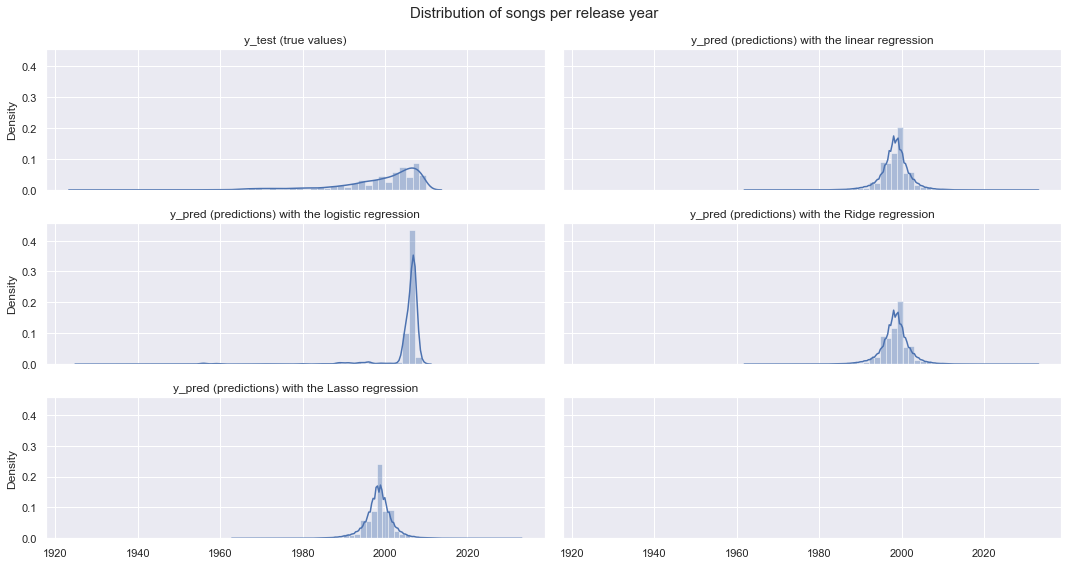

In [65]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,8))
fig.suptitle('Distribution of songs per release year', fontsize=15)

sns.distplot(y_test, hist=True, kde=True, ax=ax[0,0])
ax[0,0].set_title('y_test (true values)')

sns.distplot(y_pred_lr, hist=True, kde=True, ax=ax[0,1]);
ax[0,1].set_title('y_pred (predictions) with the linear regression')

sns.distplot(y_pred_logr, hist=True, kde=True, ax=ax[1,0]);
ax[1,0].set_title('y_pred (predictions) with the logistic regression')

sns.distplot(y_pred_rr, hist=True, kde=True, ax=ax[1,1]);
ax[1,1].set_title('y_pred (predictions) with the Ridge regression')

sns.distplot(y_pred_lassor, hist=True, kde=True, ax=ax[2,0]);
ax[2,0].set_title('y_pred (predictions) with the Lasso regression')


plt.tight_layout()

We can see that the model predicts almost only release years between 1980 and 2020, and most around the year 2000. This may be due in part to the distribution of release years in the training data set. So we have to try again with downsampling.

### Logistic regression

In [52]:
logr = linear_model.LogisticRegression()
logr.fit(df_train_pca.iloc[:,1:], df_train_pca.iloc[:,0])
 
# we round predictions as we want years
y_pred_logr = np.round(logr.predict(df_test_pca.iloc[:,1:]),0)
pd.DataFrame(y_pred_logr, columns=['year']).head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,year
0,2007.0
1,2007.0
2,2005.0
3,2007.0
4,2007.0


In [53]:
df_metrics = df_metrics.append(dict(zip(df_metrics.columns,metric('logistic regression', y_test, y_pred_logr))), ignore_index=True)
df_metrics

explained_variance:  -0.3594
R^2:  -0.7274
R^2adj:  -0.7304
MAE:  9.4371
MSE:  203.426
RMSE:  14.2627


,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted
0,linear regression,-0.093615,8.561611,128.800581,11.349034,-0.093718,-0.095628
1,logistic regression,-0.359407,9.437149,203.425954,14.262747,-0.727404,-0.730421


### Ridge Regression

In [55]:
rr = linear_model.Ridge(alpha = 0.01)
rr.fit(df_train_pca.iloc[:,1:], df_train_pca.iloc[:,0])
 
# we round predictions as we want years
y_pred_rr = np.round(rr.predict(df_test_pca.iloc[:,1:]),0)
pd.DataFrame(y_pred_rr, columns=['year']).head()

,year
0,2000.0
1,1999.0
2,1996.0
3,1998.0
4,1998.0


In [56]:
df_metrics = df_metrics.append(dict(zip(df_metrics.columns,metric('ridge regression', y_test, y_pred_rr))), ignore_index=True)
df_metrics

explained_variance:  -0.0936
R^2:  -0.0937
R^2adj:  -0.0956
MAE:  8.5616
MSE:  128.8006
RMSE:  11.349


,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted
0,linear regression,-0.093615,8.561611,128.800581,11.349034,-0.093718,-0.095628
1,logistic regression,-0.359407,9.437149,203.425954,14.262747,-0.727404,-0.730421
2,ridge regression,-0.093615,8.561611,128.800581,11.349034,-0.093718,-0.095628


### Lasso Regression

In [59]:
lassor = linear_model.Lasso(alpha = 0.01)
lassor.fit(df_train_pca.iloc[:,1:], df_train_pca.iloc[:,0])
 
# we round predictions as we want years
y_pred_lassor = np.round(lassor.predict(df_test_pca.iloc[:,1:]),0)
pd.DataFrame(y_pred_lassor, columns=['year']).head()

,year
0,2000.0
1,1999.0
2,1996.0
3,1998.0
4,1998.0


In [60]:
df_metrics = df_metrics.append(dict(zip(df_metrics.columns,metric('Lasso regression', y_test, y_pred_lassor))), ignore_index=True)
df_metrics

explained_variance:  -0.0917
R^2:  -0.0918
R^2adj:  -0.0937
MAE:  8.5524
MSE:  128.572
RMSE:  11.339


,Model,ExplainedVariance,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError,R^2,R^2adjusted
0,linear regression,-0.093615,8.561611,128.800581,11.349034,-0.093718,-0.095628
1,logistic regression,-0.359407,9.437149,203.425954,14.262747,-0.727404,-0.730421
2,ridge regression,-0.093615,8.561611,128.800581,11.349034,-0.093718,-0.095628
3,Lasso regression,-0.091675,8.552392,128.571993,11.338959,-0.091777,-0.093684


### Neural Network

In [63]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import tensorflow as tf

In [64]:
############### ERROR : module 'keras.optimizers' has no attribute 'SGD'

model = Sequential()
model.add(Dense(30, input_shape=(90,), activation='relu'))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1, ))
model.compile(loss="mean_squared_error", optimizer = optimizers.SGD(learning_rate=0.05))

# Downsampling? Resserer l'interval des années sur lesquelles on train et test notre modèle? Passer en décennies?
### Pour régression :
arrondir la prédiction à l'unité près : np.round(model.predict(X_test),0)

Notre indicateur sont la MSE et la RMSE

On enregistre le modèle sur le disque?

On plot les valeurs de y_pred et y_test
On plot un histogramme pour avoir la distribution de y_pred et y_test.

models : regression : random forrest, linear regression?, logistic regression, LASSO (LassoCV), ElasticNet

classification : Decision Tree Classifier, C-Support Vector Classification, Random Forest Classifier, Ridge Classifier

In [25]:
history = model.fit(X_train, y_train_norm, epochs = 100)

NameError: name 'y_train_norm' is not defined

# ça vaudra peut-ê la peine de tester en mode classification